#Clase 1
##2 - Moving average
$$y[n] = {1 \over {M+N+1}} \sum_{k=-M}^N x[n-k]$$

Populating the interactive namespace from numpy and matplotlib


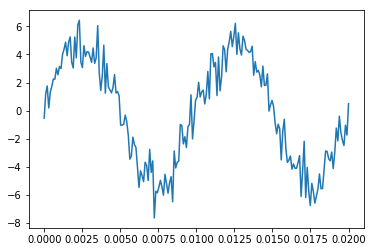

In [1]:
%pylab inline
import scipy.signal as sig
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft, ifft
from __future__ import division

########### Parámetros Iniciales ###########
Fs = 10000   # Sampling Freq 10KHz
N = 200      # Samples number
t = np.linspace(0,N/Fs,num=N) # Crea una variable de tiempo desde 0, con intervalos de 1/Fs

f1 = 100   # 100Hz
A1 = 5

signal = A1 * np.sin(2*np.pi*f1*t)

noise = np.random.normal(0,1,len(signal))
sig_noise = signal + noise
plt.plot(t,sig_noise)

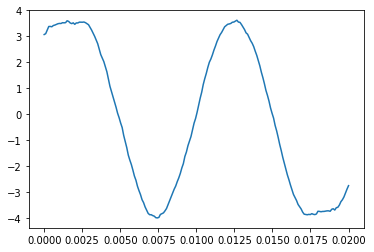

In [2]:
MVSIZE = 20

avg = np.zeros(N)
for n in range(len(sig_noise)):
    suma = 0
    d = 0
    for k in range (-(MVSIZE), MVSIZE):
        if ((n-k) > 0) and ((n-k) < (len(sig_noise))):
            suma = suma + sig_noise[(n-k)]
            d = d+1
    avg[n] = np.copy(suma/d)
plt.plot(t,avg)

/usr/lib/python2.7/dist-packages/numpy/core/numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Text(0.5,1,'Spectrum Signal+Noise')

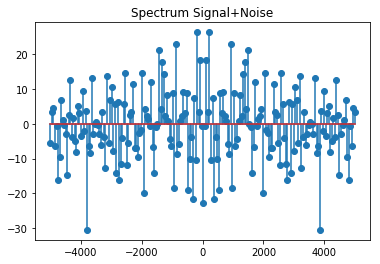

In [3]:
f = np.linspace(-Fs/2,Fs/2,N)
spec_sig_noise = np.fft.fftshift(fft(sig_noise))
spec_avg = np.fft.fftshift(fft(avg))
plt.stem(f,spec_sig_noise)
title("Spectrum Signal+Noise")

Text(0.5,1,'Spectrum Signal Averaged')

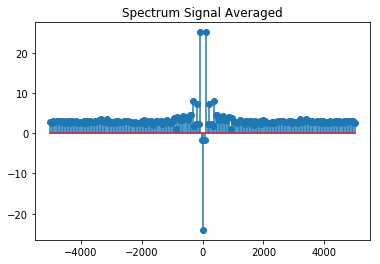

In [4]:
plt.stem(f,spec_avg)
title("Spectrum Signal Averaged")

In [5]:
## Detalles para la animación
from tempfile import NamedTemporaryFile
from matplotlib import animation

VIDEO_TAG = """<video controls>
 <source src="data:video/x-m4v;base64,{0}" type="video/mp4">
 Your browser does not support the video tag.
</video>"""

def anim_to_html(anim):
    if not hasattr(anim, '_encoded_video'):
        with NamedTemporaryFile(suffix='.mp4') as f:
            anim.save(f.name, fps=20, extra_args=['-vcodec', 'libx264'])
            video = open(f.name, "rb").read()
        anim._encoded_video = video.encode("base64")
    
    return VIDEO_TAG.format(anim._encoded_video)

from IPython.display import HTML

def display_animation(anim):
    plt.close(anim._fig)
    return HTML(anim_to_html(anim))

avg = signal + noise

In [6]:

# First set up the figure, the axis, and the plot element we want to animate
fig = plt.figure()
ax = plt.axes(xlim=(0, N), ylim=(-10, 10))
line, = ax.plot([], [], lw=2)

# initialization function: plot the background of each frame
def init():
    line.set_data([], [])
    return line,

# animation function.  This is called sequentially
def animate(n):
    x = np.linspace(0, N, len(sig_noise))
    sum = 0
    d = 0
    for k in range (-(MVSIZE), MVSIZE):
        if ((n-k) > 0) and ((n-k) < (len(sig_noise))):
            sum = sum + sig_noise[(n-k)]
            d = d+1
    avg[n] = sum/d
    line.set_data(x, avg)
    return line,

# call the animator.  blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=len(sig_noise), interval=20, blit=True)

# call our new function to display the animation
display_animation(anim)

ValueError: outfile must be *.htm or *.html